In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Read the CSV file skipping the first 20 rows

df = pd.read_csv(r'Bafoussam_Hour_1980-01-01_2020-12-31_1242947587.csv' , low_memory=False, header=22, sep=';')

# Save the DataFrame to a new CSV file

df.to_csv('Bafoussam.csv', index=False)
df.head()


# Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       289.12              77.86    893.24        1.75   
1  1980-01-01   02:00       288.79              77.21    892.72        1.77   
2  1980-01-01   03:00       288.55              75.90    892.57        1.80   
3  1980-01-01   04:00       288.24              75.23    892.78        1.97   
4  1980-01-01   05:00       287.85              75.50    893.20        2.20   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          351.21       0.0       0.0         0.0                     0.0  
1            1.70       0.0       0.0         0.0                     0.0  
2           15.39       0.0       0.0         0.0                     0.0  
3           29.98       0.0       0.0         0.0                     0.0  
4           40.09       0.0       0.0         0.0                     0.0

In [5]:
df = pd.read_csv('bafoussam.csv', sep=',', header=0)

# Rename the first column by removing the '#'character

df.rename(columns={df.columns[0]: df.columns[0].lstrip(' #')}, inplace=True)
df.head()



Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       289.12              77.86    893.24        1.75   
1  1980-01-01   02:00       288.79              77.21    892.72        1.77   
2  1980-01-01   03:00       288.55              75.90    892.57        1.80   
3  1980-01-01   04:00       288.24              75.23    892.78        1.97   
4  1980-01-01   05:00       287.85              75.50    893.20        2.20   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          351.21       0.0       0.0         0.0                     0.0  
1            1.70       0.0       0.0         0.0                     0.0  
2           15.39       0.0       0.0         0.0                     0.0  
3           29.98       0.0       0.0         0.0                     0.0  
4           40.09       0.0       0.0         0.0                     0.0

In [6]:
# Check for null values in each column
null_columns = df.isna().any()
# Check for null values in the entire DataFrame
null_dataframe = df.isna().any().any()
# Display the results
print("Null values in each column:\n", null_columns)
print("\nNull values in the entire DataFrame:", null_dataframe)

Null values in each column:
 Date                      False
UT time                   False
Temperature               False
Relative Humidity         False
Pressure                  False
Wind speed                False
Wind direction            False
Rainfall                  False
Snowfall                  False
Snow depth                False
Short-wave irradiation    False
dtype: bool

Null values in the entire DataFrame: False


In [7]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Convert the date column to ordinal representation
df['Date'] = df['Date'].apply(lambda x: x.toordinal())
# Check the updated DataFrame
df.head()

Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815   01:00       289.12              77.86    893.24        1.75   
1  722815   02:00       288.79              77.21    892.72        1.77   
2  722815   03:00       288.55              75.90    892.57        1.80   
3  722815   04:00       288.24              75.23    892.78        1.97   
4  722815   05:00       287.85              75.50    893.20        2.20   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          351.21       0.0       0.0         0.0                     0.0  
1            1.70       0.0       0.0         0.0                     0.0  
2           15.39       0.0       0.0         0.0                     0.0  
3           29.98       0.0       0.0         0.0                     0.0  
4           40.09       0.0       0.0         0.0                     0.0

In [8]:
# Split the time string into hours and minutes
split_time = df['UT time'].str.split(':')
# Extract hours and minutes from the split result
hours = split_time.str[0].astype(int)
minutes = split_time.str[1].astype(int)
# Combine hours and minutes into a single numerical representation (e.g., minutes since midnight)
time_numeric = hours * 60 + minutes
# Replace the original time column with the new numerical representation
df['UT time'] = time_numeric
# Check the updated DataFrame
df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       289.12              77.86    893.24        1.75   
1  722815      120       288.79              77.21    892.72        1.77   
2  722815      180       288.55              75.90    892.57        1.80   
3  722815      240       288.24              75.23    892.78        1.97   
4  722815      300       287.85              75.50    893.20        2.20   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          351.21       0.0       0.0         0.0                     0.0  
1            1.70       0.0       0.0         0.0                     0.0  
2           15.39       0.0       0.0         0.0                     0.0  
3           29.98       0.0       0.0         0.0                     0.0  
4           40.09       0.0       0.0         0.0                     0.0

In [9]:

# Convert the wind speed data to the desired units (e.g., from m/s to knots)
df['Wind speed'] = df['Wind speed'] * 1.94384  # Conversion from m/s to knots

# Optionally, drop the original 'Wind Speed' column
# df.drop(columns=['Wind Speed'], inplace=True)

df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       289.12              77.86    893.24    3.401720   
1  722815      120       288.79              77.21    892.72    3.440597   
2  722815      180       288.55              75.90    892.57    3.498912   
3  722815      240       288.24              75.23    892.78    3.829365   
4  722815      300       287.85              75.50    893.20    4.276448   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          351.21       0.0       0.0         0.0                     0.0  
1            1.70       0.0       0.0         0.0                     0.0  
2           15.39       0.0       0.0         0.0                     0.0  
3           29.98       0.0       0.0         0.0                     0.0  
4           40.09       0.0       0.0         0.0                     0.0

In [10]:
column_list = df.columns.tolist()
column_list

['Date',
 'UT time',
 'Temperature',
 'Relative Humidity',
 'Pressure',
 'Wind speed',
 'Wind direction',
 'Rainfall',
 'Snowfall',
 'Snow depth',
 'Short-wave irradiation']

In [11]:
# Drop the columns that are not in correlation
df = df.drop(columns=[
                      'Snowfall',
                      'Snow depth',
                    ])
# Check the updated DataFrame
df.head()


Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       289.12              77.86    893.24    3.401720   
1  722815      120       288.79              77.21    892.72    3.440597   
2  722815      180       288.55              75.90    892.57    3.498912   
3  722815      240       288.24              75.23    892.78    3.829365   
4  722815      300       287.85              75.50    893.20    4.276448   

   Wind direction  Rainfall  Short-wave irradiation  
0          351.21       0.0                     0.0  
1            1.70       0.0                     0.0  
2           15.39       0.0                     0.0  
3           29.98       0.0                     0.0  
4           40.09       0.0                     0.0

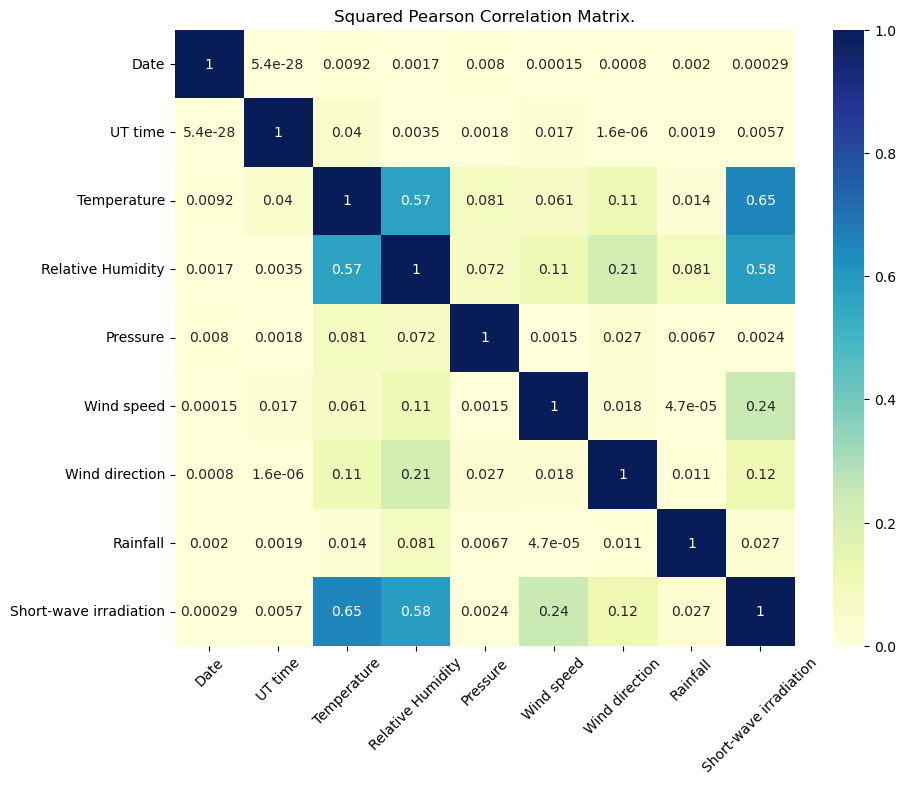

In [12]:
import seaborn as sns

# Compute correlation matrix using Pearson correlation method

corr_matrix = df.corr(method='pearson') ** 2 # Square each correlation coefficient

# Plot correlation matrix as a heatmap

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
# Set the feature names as labels for both axes
plt.xticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=0)
plt.title("Squared Pearson Correlation Matrix.")
plt.show()

In [13]:
df.corr()


Date       UT time  Temperature  \
Date                    1.000000e+00 -2.333244e-14     0.095754   
UT time                -2.333244e-14  1.000000e+00     0.200110   
Temperature             9.575362e-02  2.001097e-01     1.000000   
Relative Humidity      -4.137838e-02 -5.892487e-02    -0.756245   
Pressure                8.947379e-02  4.255814e-02    -0.284983   
Wind speed              1.213538e-02 -1.291972e-01     0.246234   
Wind direction         -2.825304e-02  1.254051e-03    -0.334736   
Rainfall               -4.460809e-02  4.392042e-02    -0.118334   
Short-wave irradiation  1.711145e-02 -7.543348e-02     0.807030   

                        Relative Humidity  Pressure  Wind speed  \
Date                            -0.041378  0.089474    0.012135   
UT time                         -0.058925  0.042558   -0.129197   
Temperature                     -0.756245 -0.284983    0.246234   
Relative Humidity                1.000000  0.267647   -0.333616   
Pressure                         0.267647  1.000000    0.038475   
Wind speed                      -0.333616  0.038475    1.000000   
Wind direction                   0.459575  0.163106   -0.134573   
Rainfall                         0.284491  0.081726   -0.006891   
Short-wave irradiation          -0.764845 -0.048607    0.490004   

                        Wind direction  Rainfall  Short-wave irradiation  
Date                         -0.028253 -0.044608                0.017111  
UT time                       0.001254  0.043920               -0.075433  
Temperature                  -0.334736 -0.118334                0.807030  
Relative Humidity             0.459575  0.284491               -0.764845  
Pressure                      0.163106  0.081726               -0.048607  
Wind speed                   -0.134573 -0.006891                0.490004  
Wind direction                1.000000  0.104616               -0.343517  
Rainfall                      0.104616  1.000000               -0.165656  
Short-wave irradiation       -0.343517 -0.165656                1.000000

In [14]:
# Drop the columns that are not in correlation
df = df.drop(columns=['Date',
                      'Temperature',
                      'Rainfall',
                      'Wind direction',
                      'Pressure',
                    ])
# Check the updated DataFrame
df.head()


UT time  Relative Humidity  Wind speed  Short-wave irradiation
0       60              77.86    3.401720                     0.0
1      120              77.21    3.440597                     0.0
2      180              75.90    3.498912                     0.0
3      240              75.23    3.829365                     0.0
4      300              75.50    4.276448                     0.0

In [15]:
 #Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Split the dataset
train, valid, test = np.split(df, [int(0.6*len(df)), int(0.8*len(df))])
# Check the sizes of the splits
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 215654
Validation set size: 71885
Test set size: 71885


C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
from sklearn.preprocessing import RobustScaler
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
# Initialize the scaler
    scaler = RobustScaler()
# Fit the scaler on the training data and transform it
    X = scaler.fit_transform(X)
    return X, y

train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)


In [17]:

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title):
    # Calculate R²
    r2_rf = r2_score(test_y, predictions)
    # Calculate RMSE
    rmse_rf = np.sqrt(mean_squared_error(test_y, predictions))
    # Calculate Relative RMSE (rRMSE)
    rrmse_rf = rmse_rf / np.std(test_y)
    # Calculate Mean Bias Error (MBE)
    mbe_rf = np.mean(predictions - test_y)
    # Calculate Mean Absolute Bias Error (MABE)
    mabe_rf = np.mean(np.abs(predictions - test_y))
    # Calculate Mean Absolute Error (MAE)
    mae_rf = mean_absolute_error(test_y, predictions)
    # Calculate Mean Squared Error (MSE)
    mse_rf = mean_squared_error(test_y, predictions)
    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse_rf, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })
    # Print the evaluation table with formatted values
    print(title)
    pd.options.display.float_format = '{:.6f}'.format
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [18]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):

    # Calculate error curve
    error_curve = test_y - predictions
    # Set figure size
    plt.figure(figsize=(20, 6))
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    # Show plot
    plt.tight_layout()
    plt.show()


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Machine regressor model
model_gbm = GradientBoostingRegressor(random_state=1000)
# Train the model
model_gbm.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_gbm = model_gbm.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_gbm, test_y, "Buea South wes Metrics Evaluation for Gradient Booting Machine Models")


Buea South wes Metrics Evaluation for Gradient Booting Machine Models
  Metric         Value
0     R²      0.886898
1   RMSE     91.880203
2  rRMSE      0.336307
3    MBE     -8.841244
4   MABE     55.854414
5    MAE     55.854414
6    MSE   8441.971761
7    AIC 649912.213366


Metric         Value
0     R²      0.886898
1   RMSE     91.880203
2  rRMSE      0.336307
3    MBE     -8.841244
4   MABE     55.854414
5    MAE     55.854414
6    MSE   8441.971761
7    AIC 649912.213366

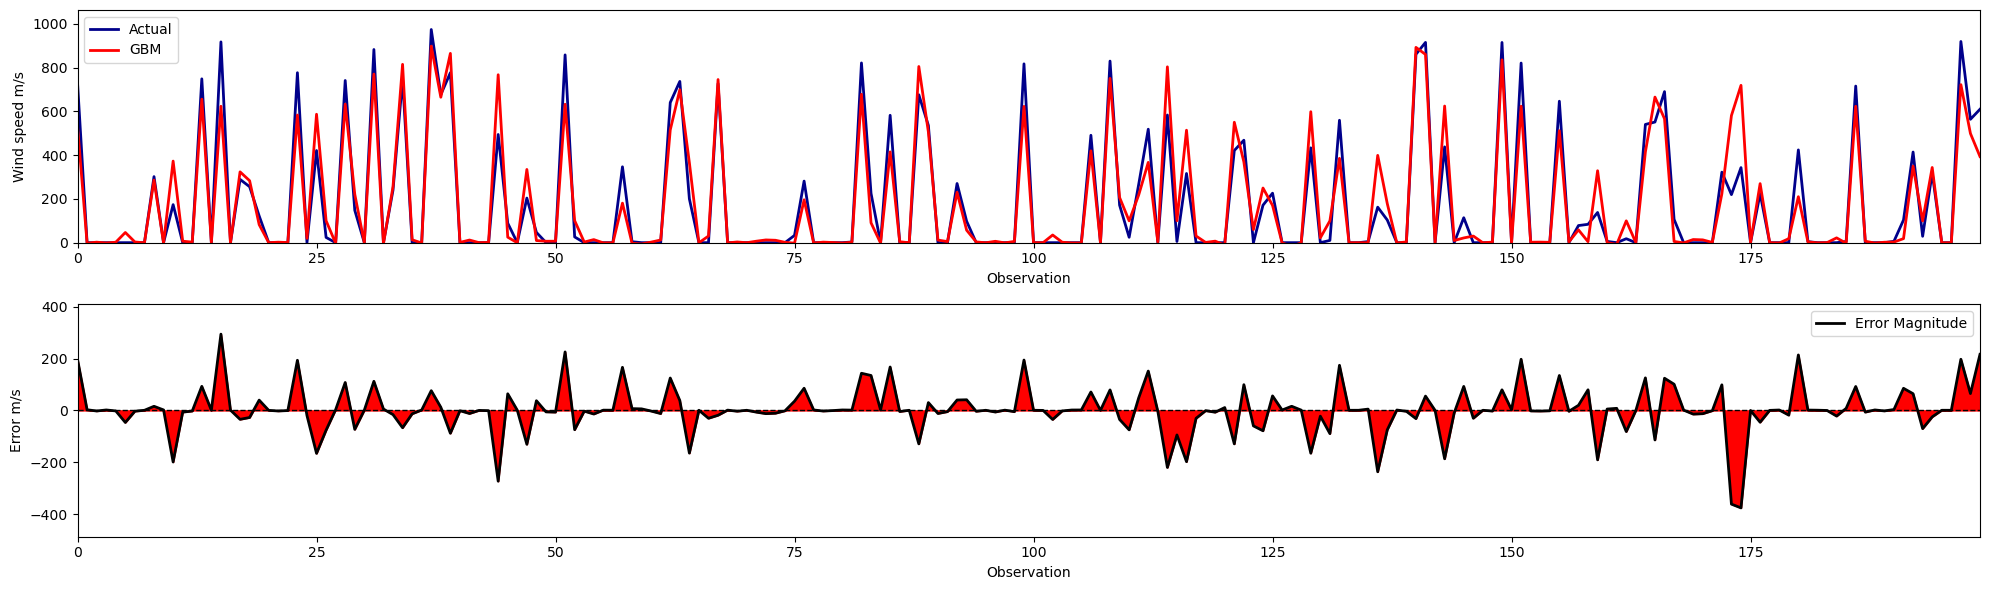

In [20]:
plot_actual_vs_predicted(test_y, predictions_gbm, label='GBM')


In [44]:
from sklearn.svm import SVR
# Create and train the linear SVR model
svr_poly = SVR(kernel='linear')
svr_poly.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_svm = svr_poly.predict(test_X_scaled)
evaluate_model(predictions_svm, test_y, "Buea south west Metrics Evaluation for Svm Model")


Buea south west Metrics Evaluation for Svm Model
  Metric         Value
0     R²      0.646570
1   RMSE    162.350386
2  rRMSE      0.824875
3    MBE     -7.953123
4   MABE    112.147014
5    MAE    112.147014
6    MSE  26381.557155
7    AIC 731821.524220


Metric         Value
0     R²      0.646570
1   RMSE    162.350386
2  rRMSE      0.824875
3    MBE     -7.953123
4   MABE    112.147014
5    MAE    112.147014
6    MSE  26381.557155
7    AIC 731821.524220

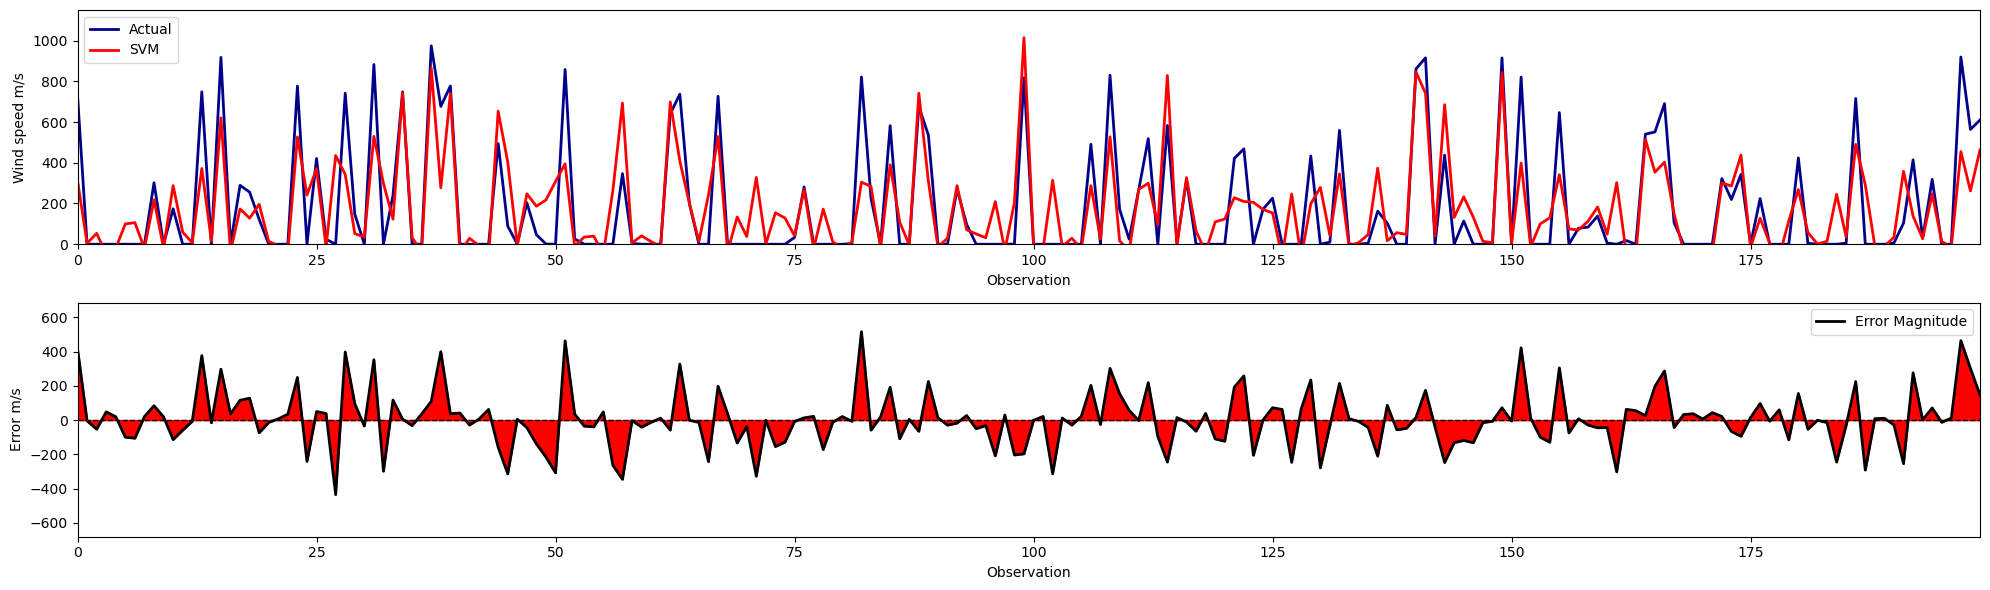

In [45]:
plot_actual_vs_predicted(test_y, predictions_svm, label='SVM')

In [21]:
from sklearn.neighbors import KNeighborsRegressor
# Create a k-Nearest Neighbors regressor model with k=5
model_knn = KNeighborsRegressor(n_neighbors=5)
# Train the model
model_knn.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_knn = model_knn.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_knn, test_y, "Buea SW Metrics Evaluation for k-Nearest Neighbors Model (k=5)")


Buea SW Metrics Evaluation for k-Nearest Neighbors Model (k=5)
  Metric         Value
0     R²      0.891962
1   RMSE     89.799733
2  rRMSE      0.328692
3    MBE    -10.029833
4   MABE     51.118243
5    MAE     51.118243
6    MSE   8063.992028
7    AIC 646619.364264


Metric         Value
0     R²      0.891962
1   RMSE     89.799733
2  rRMSE      0.328692
3    MBE    -10.029833
4   MABE     51.118243
5    MAE     51.118243
6    MSE   8063.992028
7    AIC 646619.364264

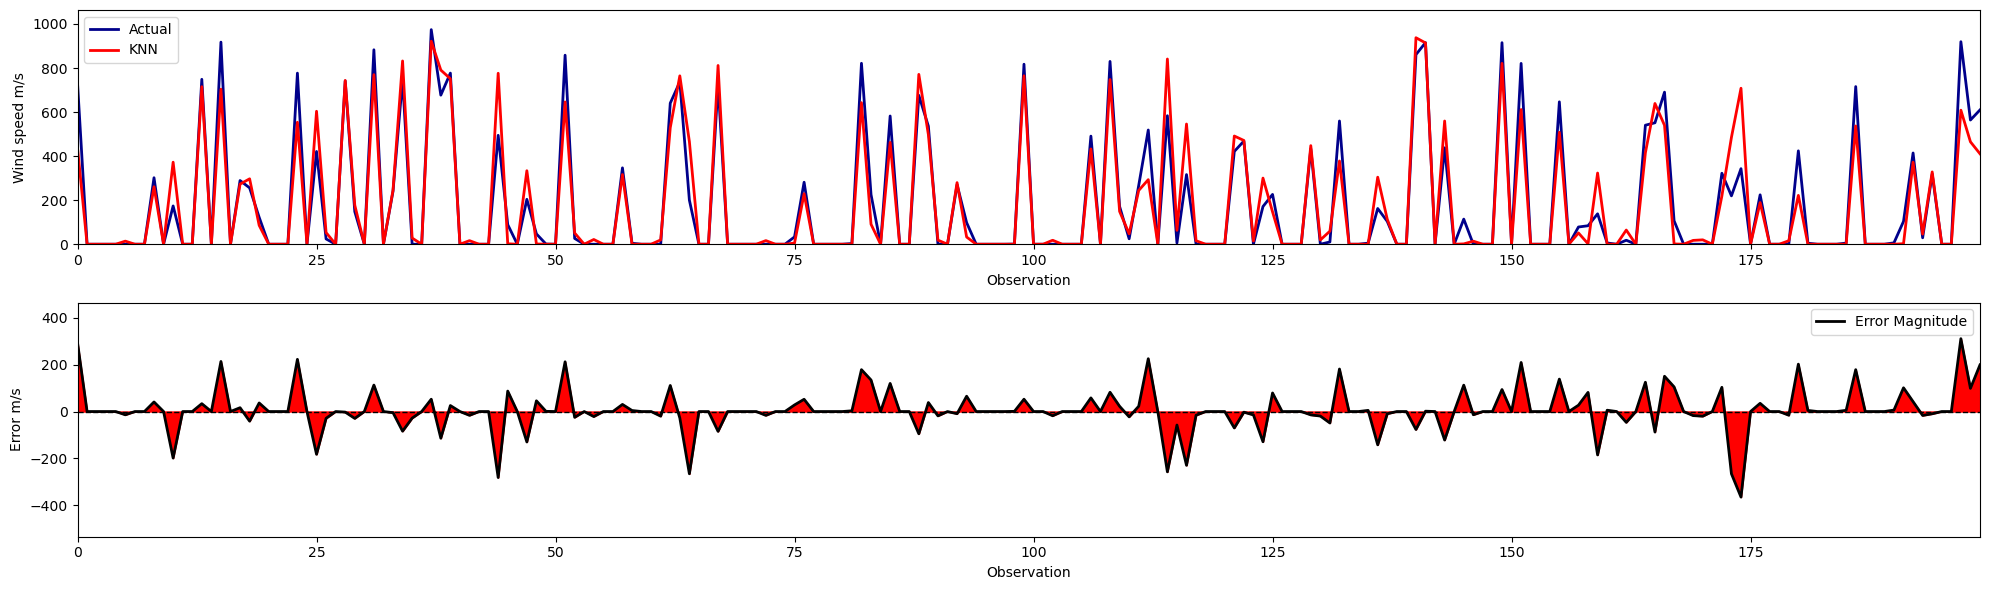

In [22]:
plot_actual_vs_predicted(test_y, predictions_knn, label='KNN')


In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Reshape data for LSTM (assuming train_X_scaled and test_X_scaled are 3D arrays)
train_X_lstm = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_lstm = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
# Train the LSTM model
model_lstm.fit(train_X_lstm, train_y, epochs=10, batch_size=16, verbose=0)
# Make predictions on the test set
predictions_lstm = model_lstm.predict(test_X_lstm)
# Flatten predictions
predictions_lstm = predictions_lstm.flatten()
# Evaluate the model
evaluate_model(predictions_lstm, test_y, "Buea south west Metrics Evaluation for LSTM Model")


2247/2247 [==============================] - 4s 2ms/step
Buea south west Metrics Evaluation for LSTM Model
  Metric         Value
0     R²      0.893883
1   RMSE     88.997620
2  rRMSE      0.325756
3    MBE    -11.287701
4   MABE     52.968902
5    MAE     52.968902
6    MSE   7920.576357
7    AIC 645329.406111


Metric         Value
0     R²      0.893883
1   RMSE     88.997620
2  rRMSE      0.325756
3    MBE    -11.287701
4   MABE     52.968902
5    MAE     52.968902
6    MSE   7920.576357
7    AIC 645329.406111

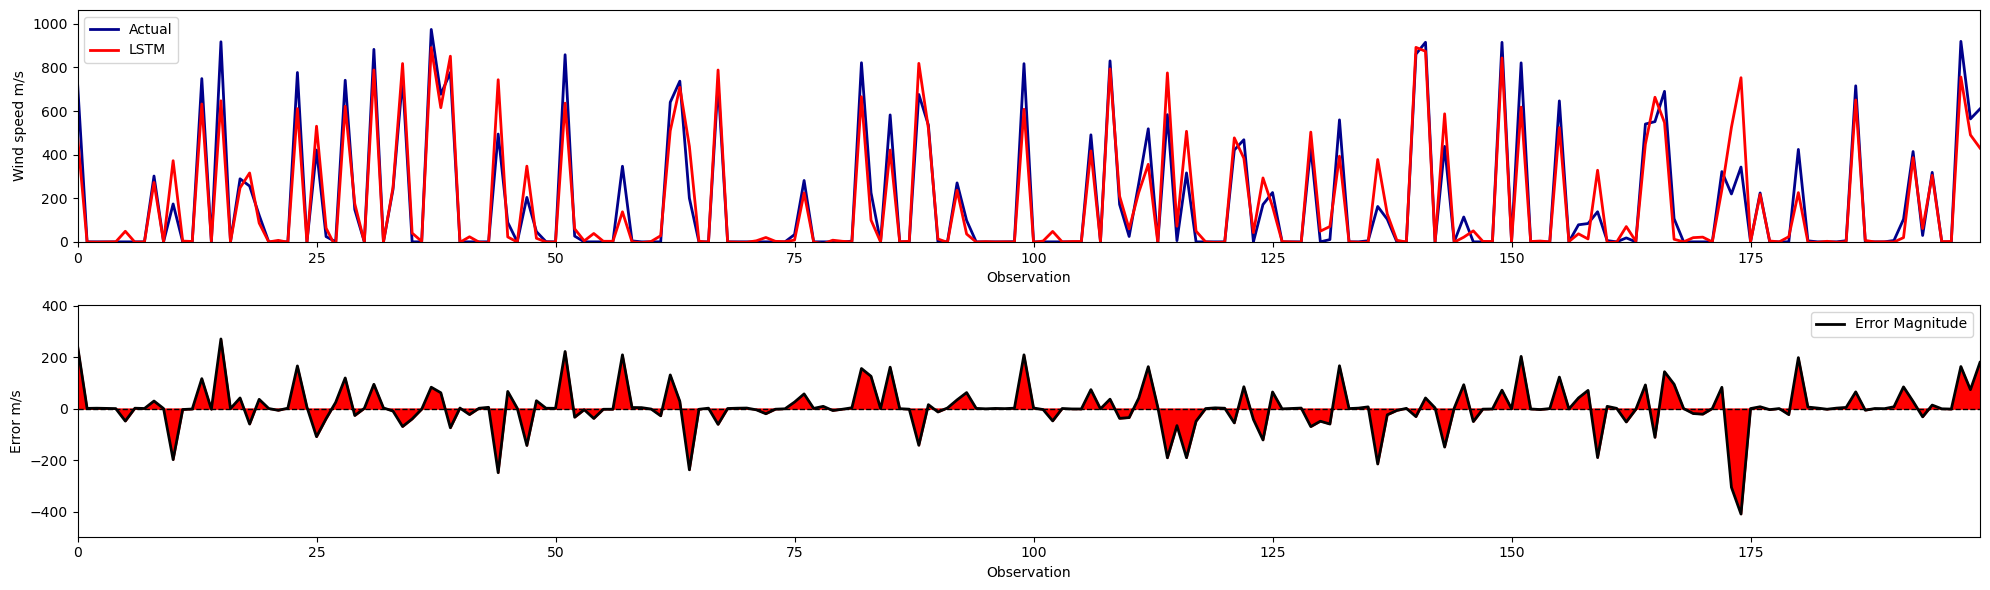

In [25]:
plot_actual_vs_predicted(test_y, predictions_lstm, label='LSTM')


In [26]:
from sklearn.neural_network import MLPRegressor
# Create a Multi-Layer Perceptron (MLP) regressor model
model_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
# Train the ANN model
model_ann.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_ann = model_ann.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_ann, test_y, "ANN Metrics Evaluation")

ANN Metrics Evaluation
  Metric         Value
0     R²      0.894772
1   RMSE     88.623922
2  rRMSE      0.324388
3    MBE    -10.327431
4   MABE     52.176567
5    MAE     52.176567
6    MSE   7854.199478
7    AIC 644724.449165


Metric         Value
0     R²      0.894772
1   RMSE     88.623922
2  rRMSE      0.324388
3    MBE    -10.327431
4   MABE     52.176567
5    MAE     52.176567
6    MSE   7854.199478
7    AIC 644724.449165

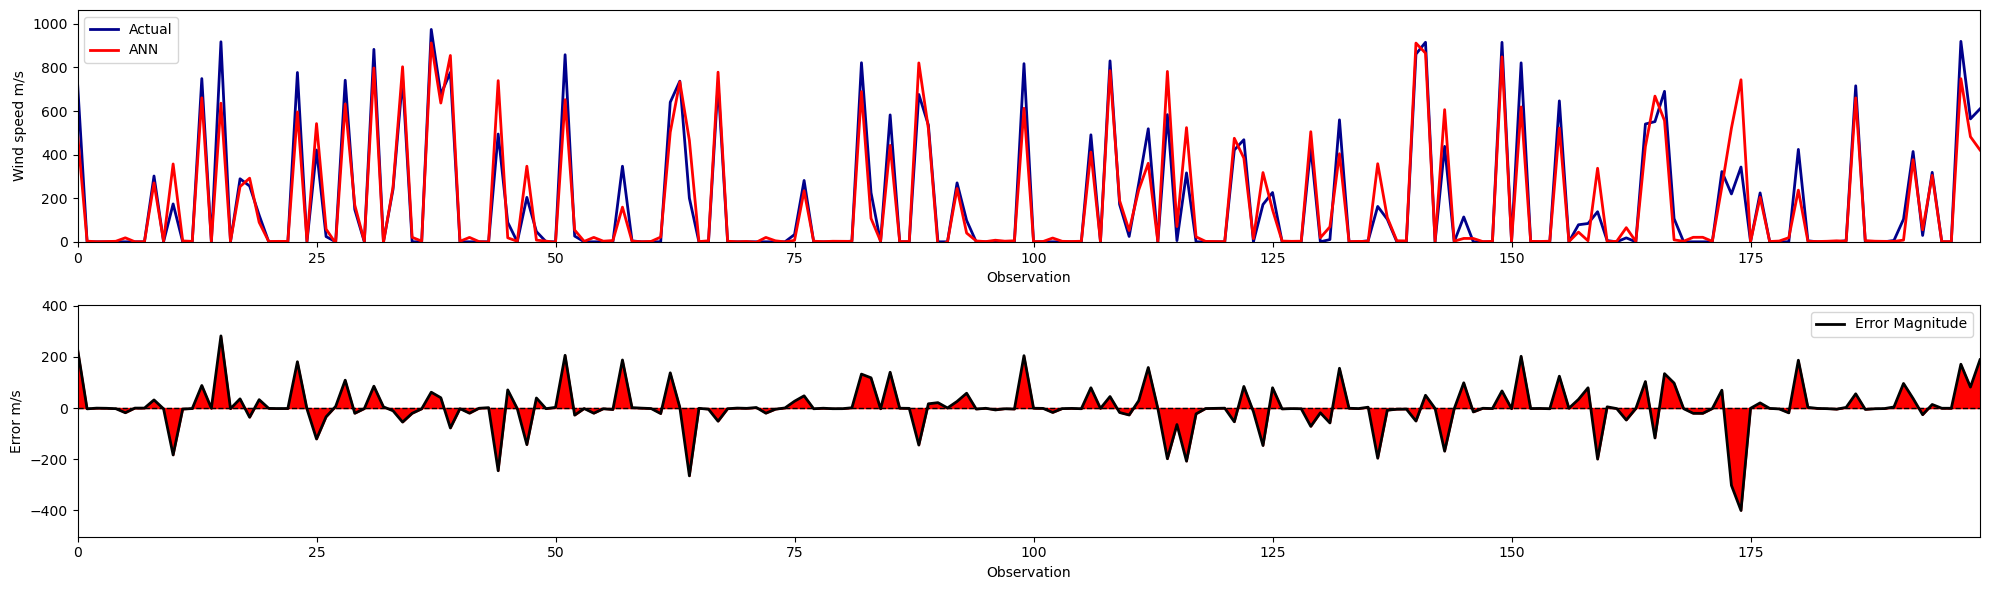

In [27]:
plot_actual_vs_predicted(test_y, predictions_ann, label='ANN')

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title, batch_size=1000):
    # Ensure batch_size is an integer
    batch_size = int(batch_size)

    # Calculate metrics in batches
    rmse_batches = []
    mbe_batches = []
    mabe_batches = []
    mae_batches = []
    mse_batches = []
    for i in range(0, len(predictions), batch_size):
        batch_predictions = predictions[i:i+batch_size]
        batch_test_y = test_y[i:i+batch_size]

        # RMSE
        rmse_batches.append(np.sqrt(np.mean((batch_predictions - batch_test_y)**2)))
        # MBE
        mbe_batches.append(np.mean(batch_predictions - batch_test_y))
        # MABE
        mabe_batches.append(np.mean(np.abs(batch_predictions - batch_test_y)))
        # MAE
        mae_batches.append(mean_absolute_error(batch_test_y, batch_predictions))
        # MSE
        mse_batches.append(mean_squared_error(batch_test_y, batch_predictions))

    # Aggregate metrics
    rmse_rf = np.mean(rmse_batches)
    mbe_rf = np.mean(mbe_batches)
    mabe_rf = np.mean(mabe_batches)
    mae_rf = np.mean(mae_batches)
    mse_rf = np.mean(mse_batches)

    # Calculate other metrics
    r2_rf = r2_score(test_y, predictions)
    rrmse_rf = rmse_rf / np.std(test_y)
    rrmse = rmse_rf / np.mean(test_y)

    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })

    # Print the evaluation table with formatted values
    pd.options.display.float_format = '{:.6f}'.format
    print(title)
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):
    # Initialize error curve array
    error_curve = np.zeros_like(test_y)
    
    # Calculate error curve in batches
    for i in range(0, len(test_y), sample_size):
        batch_test_y = test_y[i:i+sample_size]
        batch_predictions = predictions[i:i+sample_size].flatten() # Flatten predictions to match batch_test_y shape
        error_curve[i:i+len(batch_test_y)] = batch_test_y - batch_predictions
    
    # Set figure size
    plt.figure(figsize=(20, 6))
    
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

input_shape = train_X_scaled.shape[1]

# Define the model architecture
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model_dl.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model_dl.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_dl = model_dl.predict(test_X_scaled)

# Evaluate the model
results = model_dl.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model_dl.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model using your custom evaluation function
evaluation_table_dl = evaluate_model(predictions_dl, test_y, "FNN Metrics Evaluation", batch_size=1000)

Epoch 1/5
21566/21566 [==============================] - 51s 2ms/step - loss: 15275.7393 - root_mean_squared_error: 123.5951 - r_squared: -926173376.0000 - val_loss: 5201.9829 - val_root_mean_squared_error: 72.1248 - val_r_squared: -146529312.0000
Epoch 2/5
21566/21566 [==============================] - 53s 2ms/step - loss: 7371.0942 - root_mean_squared_error: 85.8551 - r_squared: -359728352.0000 - val_loss: 4056.2915 - val_root_mean_squared_error: 63.6890 - val_r_squared: -28038740.0000
Epoch 3/5
21566/21566 [==============================] - 54s 3ms/step - loss: 5052.6807 - root_mean_squared_error: 71.0822 - r_squared: -76164224.0000 - val_loss: 3533.7153 - val_root_mean_squared_error: 59.4451 - val_r_squared: -12452752.0000
Epoch 4/5
21566/21566 [==============================] - 57s 3ms/step - loss: 4347.3564 - root_mean_squared_error: 65.9345 - r_squared: -41000184.0000 - val_loss: 3454.9888 - val_root_mean_squared_error: 58.7792 - val_r_squared: -7796643.5000
Epoch 5/5
2247/2247 

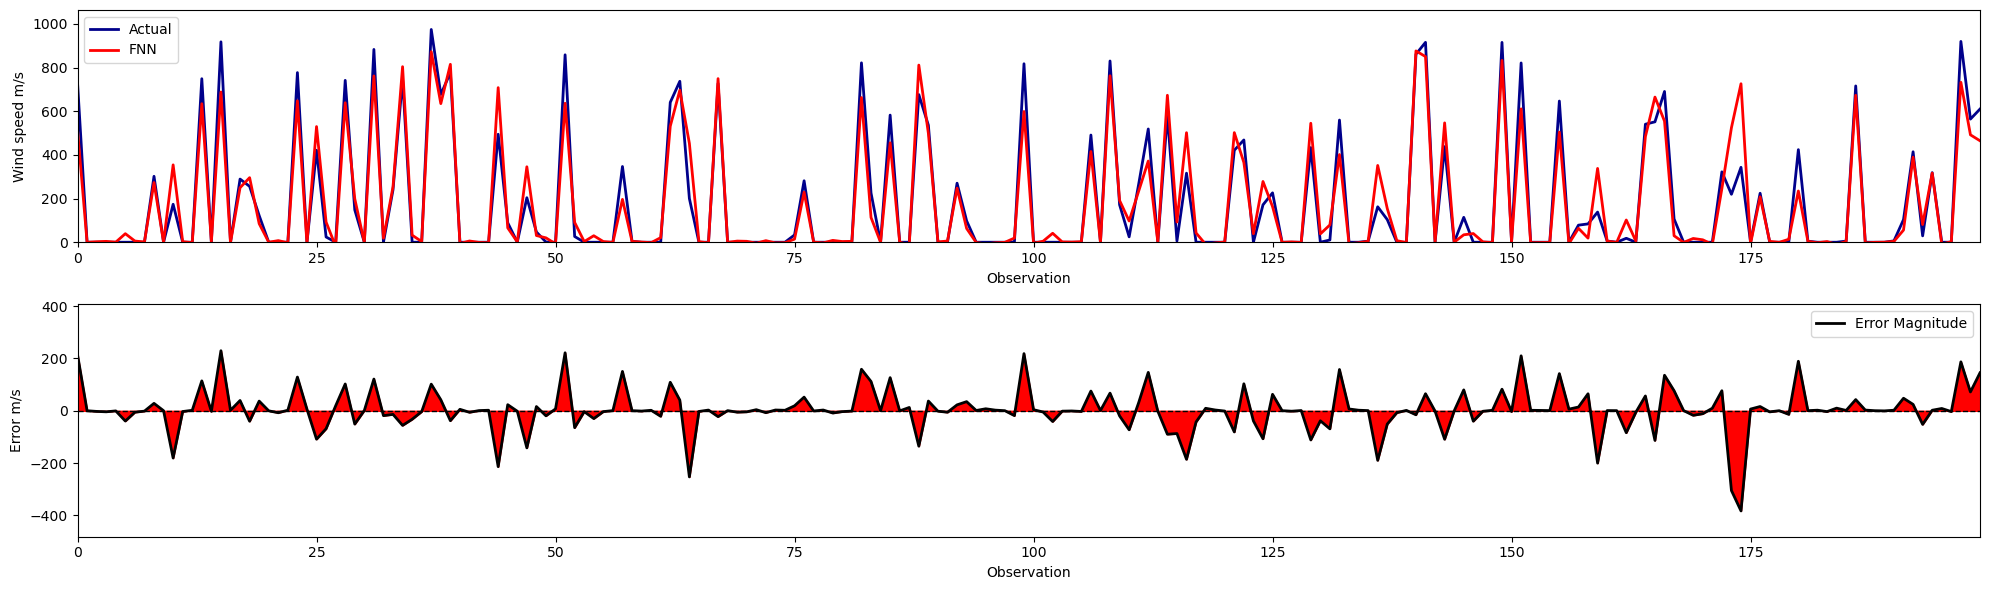

In [31]:
plot_actual_vs_predicted(test_y, predictions_dl, label='FNN')


In [32]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, SimpleRNN
# from tensorflow.keras.optimizers import Adam

# # Reshape input data to 3D for RNN (samples, timesteps, features)
# # Here we assume each sample is a single timestep
# train_X_scaled = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
# valid_X_scaled = np.reshape(valid_X_scaled, (valid_X_scaled.shape[0], 1, valid_X_scaled.shape[1]))
# test_X_scaled = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# # Define the RNN model architecture
# model_rnn = Sequential([
#     SimpleRNN(50, activation='relu', input_shape=(1, train_X_scaled.shape[2])),
#     Dense(1) # Output layer with one unit for regression
# ])

# # Compile the model
# model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# # Train the model
# history = model_rnn.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# # Make predictions on the test set
# predictions_rnn = model_rnn.predict(test_X_scaled)

# # Evaluate the model
# evaluate_model(predictions_rnn, test_y, "RNN Metrics Evaluation")

In [33]:
# plot_actual_vs_predicted(test_y, predictions_rnn, label='RNN')

In [34]:
num_features = train_X_scaled.shape[1]
num_features
train_X_scaled.shape

(215654, 3)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Function to scale the dataset
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = X.reshape(X.shape[0], -1)  # Flatten for Dense layer input
    return X, y

# Assuming train, valid, and test are your dataframes
train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)

# Print the shapes for debugging
print("Shape of train_X_scaled:", train_X_scaled.shape)
print("Shape of valid_X_scaled:", valid_X_scaled.shape)
print("Shape of test_X_scaled:", test_X_scaled.shape)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model.fit(train_X_scaled, train_y, epochs=10, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# Make predictions on the test set
predictions = model.predict(test_X_scaled)

# Evaluate the model
results = model.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Assuming evaluate_model is defined elsewhere in your code
evaluate_model(predictions, test_y, "Model Metrics Evaluation")

Shape of train_X_scaled: (215654, 3)
Shape of valid_X_scaled: (71885, 3)
Shape of test_X_scaled: (71885, 3)
Epoch 1/10
26957/26957 [==============================] - 73s 3ms/step - loss: 15375.3213 - root_mean_squared_error: 123.9973 - r_squared: -1148154368.0000 - val_loss: 9123.9658 - val_root_mean_squared_error: 95.5195 - val_r_squared: -117094208.0000
Epoch 2/10
26957/26957 [==============================] - 69s 3ms/step - loss: 4923.4023 - root_mean_squared_error: 70.1670 - r_squared: -42059584.0000 - val_loss: 8411.7822 - val_root_mean_squared_error: 91.7158 - val_r_squared: -14492507.0000
Epoch 3/10
26957/26957 [==============================] - 75s 3ms/step - loss: 4297.8198 - root_mean_squared_error: 65.5578 - r_squared: -30731764.0000 - val_loss: 8627.2129 - val_root_mean_squared_error: 92.8828 - val_r_squared: -12795807.0000
Epoch 4/10
26957/26957 [==============================] - 76s 3ms/step - loss: 4146.8271 - root_mean_squared_error: 64.3959 - r_squared: -20055326.0000 

Metric         Value
0     R²      0.889881
1   RMSE    375.970226
2  rRMSE      1.910242
3    MBE     -6.581126
4   MABE    268.045221
5    MAE     56.243669
6    MSE   8219.894003
7    AIC 647995.860748

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Function to scale the dataset
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = X.reshape(X.shape[0], -1)  # Flatten for Dense layer input
    return X, y

# Assuming train, valid, and test are your dataframes
train_X_cnn, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_cnn, test_y = scale_dataset(test)

# Print the shapes for debugging
print("Shape of train_X_scaled:", train_X_cnn.shape)
print("Shape of valid_X_scaled:", valid_X_scaled.shape)
print("Shape of test_X_scaled:", test_X_cnn.shape)

# # Define the CNN model architecture
# input_shape = (train_X_cnn.shape[1],)
# model_cnn = Sequential([
#     Conv1D(64, kernel_size=2, activation='relu', input_shape=input_shape),
#     Dropout(0.2),
#     Conv1D(32, kernel_size=2, activation='relu'),
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dense(1) # Output layer with one unit for regression
# ])


# Define the model architecture
model_cnn = Sequential([
    Dense(64, activation='relu', input_shape=(train_X_cnn.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])


# Compile the model with custom R² metric
model_cnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the CNN model
history = model_cnn.fit(train_X_cnn, train_y, epochs=10, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_cnn = model_cnn.predict(test_X_cnn)

# Evaluate the model
results = model_cnn.evaluate(test_X_cnn, test_y, verbose=0)

# Print all metrics
metric_names = model_cnn.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model with custom function
evaluate_model(predictions_cnn, test_y, "CNN Metrics Evaluation")

Shape of train_X_scaled: (215654, 3)
Shape of valid_X_scaled: (71885, 3)
Shape of test_X_scaled: (71885, 3)
Epoch 1/10
21566/21566 [==============================] - 59s 3ms/step - loss: 15604.9365 - root_mean_squared_error: 124.9197 - r_squared: -1373428736.0000 - val_loss: 4801.7178 - val_root_mean_squared_error: 69.2944 - val_r_squared: -81992936.0000
Epoch 2/10
21566/21566 [==============================] - 58s 3ms/step - loss: 5573.4150 - root_mean_squared_error: 74.6553 - r_squared: -47681692.0000 - val_loss: 4008.2258 - val_root_mean_squared_error: 63.3106 - val_r_squared: -11524452.0000
Epoch 3/10
21566/21566 [==============================] - 51s 2ms/step - loss: 4710.8926 - root_mean_squared_error: 68.6359 - r_squared: -26503626.0000 - val_loss: 3833.1128 - val_root_mean_squared_error: 61.9121 - val_r_squared: -17598270.0000
Epoch 4/10
21566/21566 [==============================] - 48s 2ms/step - loss: 4405.9585 - root_mean_squared_error: 66.3774 - r_squared: -26280666.0000 -

Metric         Value
0     R²      0.886258
1   RMSE    373.236121
2  rRMSE      1.896350
3    MBE    -11.795810
4   MABE    265.007640
5    MAE     55.646078
6    MSE   8490.716271
7    AIC 650326.088445

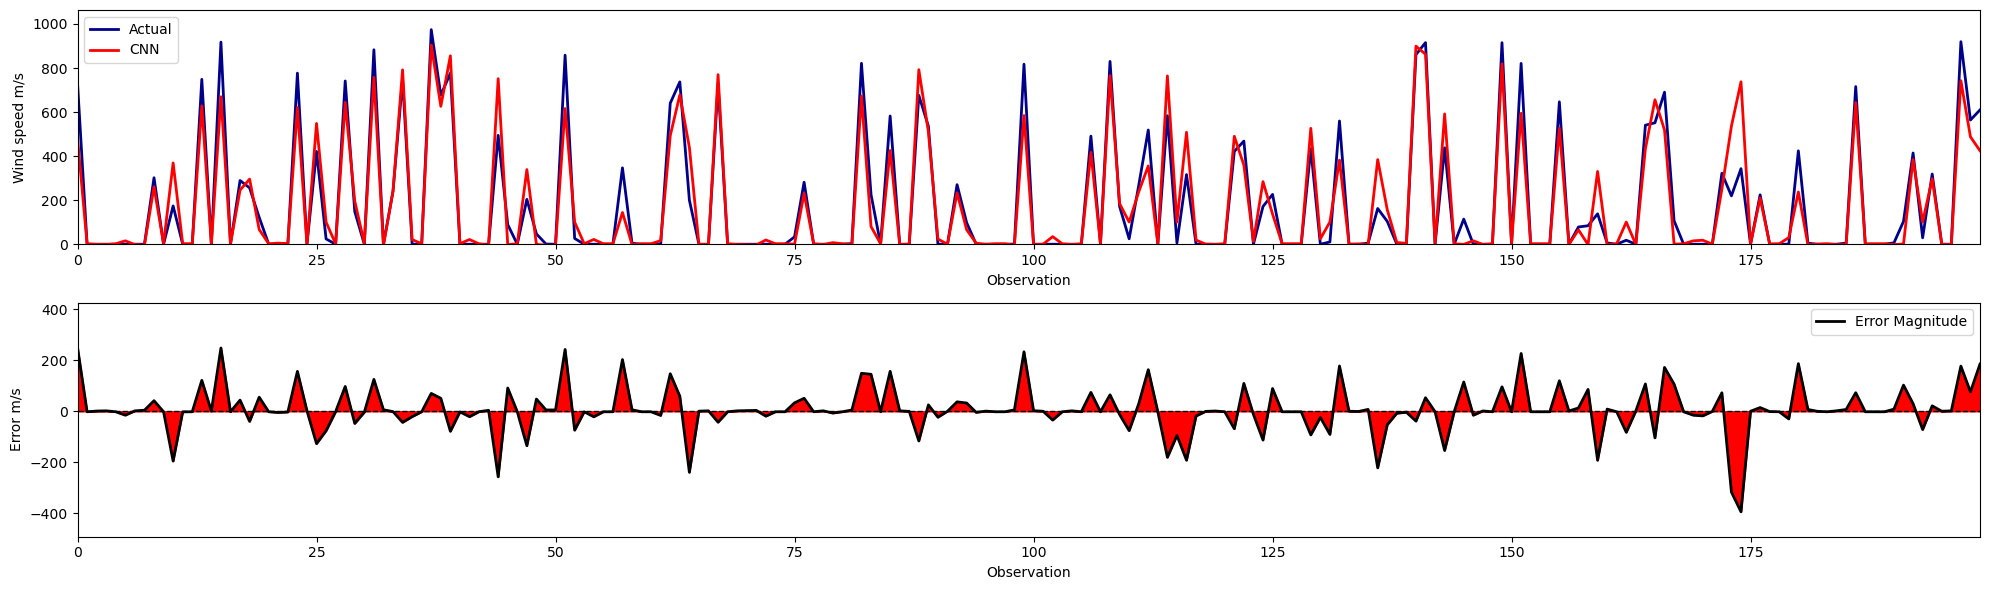

In [37]:
plot_actual_vs_predicted(test_y, predictions_cnn, label='CNN')


In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Initialize the CatBoost regressor
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=False)

# Fit the model to the training data
cat_model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_catboost = cat_model.predict(test_X_scaled)

# Evaluate the model's performance
r2 = r2_score(test_y, predictions_catboost)
print(f"R-squared: {r2:.2f}")

# from sklearn.svm import SVR
# # Create and train the linear SVR model
# svr_poly = SVR(kernel='linear')
# svr_poly.fit(train_X_scaled, train_y)
# # Make predictions on the test set
# predictions_svm = svr_poly.predict(test_X_scaled)
evaluate_model(predictions_catboost, test_y, "west Metrics Evaluation for catboost Model")


R-squared: 0.89
west Metrics Evaluation for catboost Model
  Metric         Value
0     R²      0.894678
1   RMSE     88.633686
2  rRMSE      0.450333
3    MBE    -12.464086
4   MABE     51.593476
5    MAE     51.593476
6    MSE   7862.700672
7    AIC 644802.213654


Metric         Value
0     R²      0.894678
1   RMSE     88.633686
2  rRMSE      0.450333
3    MBE    -12.464086
4   MABE     51.593476
5    MAE     51.593476
6    MSE   7862.700672
7    AIC 644802.213654

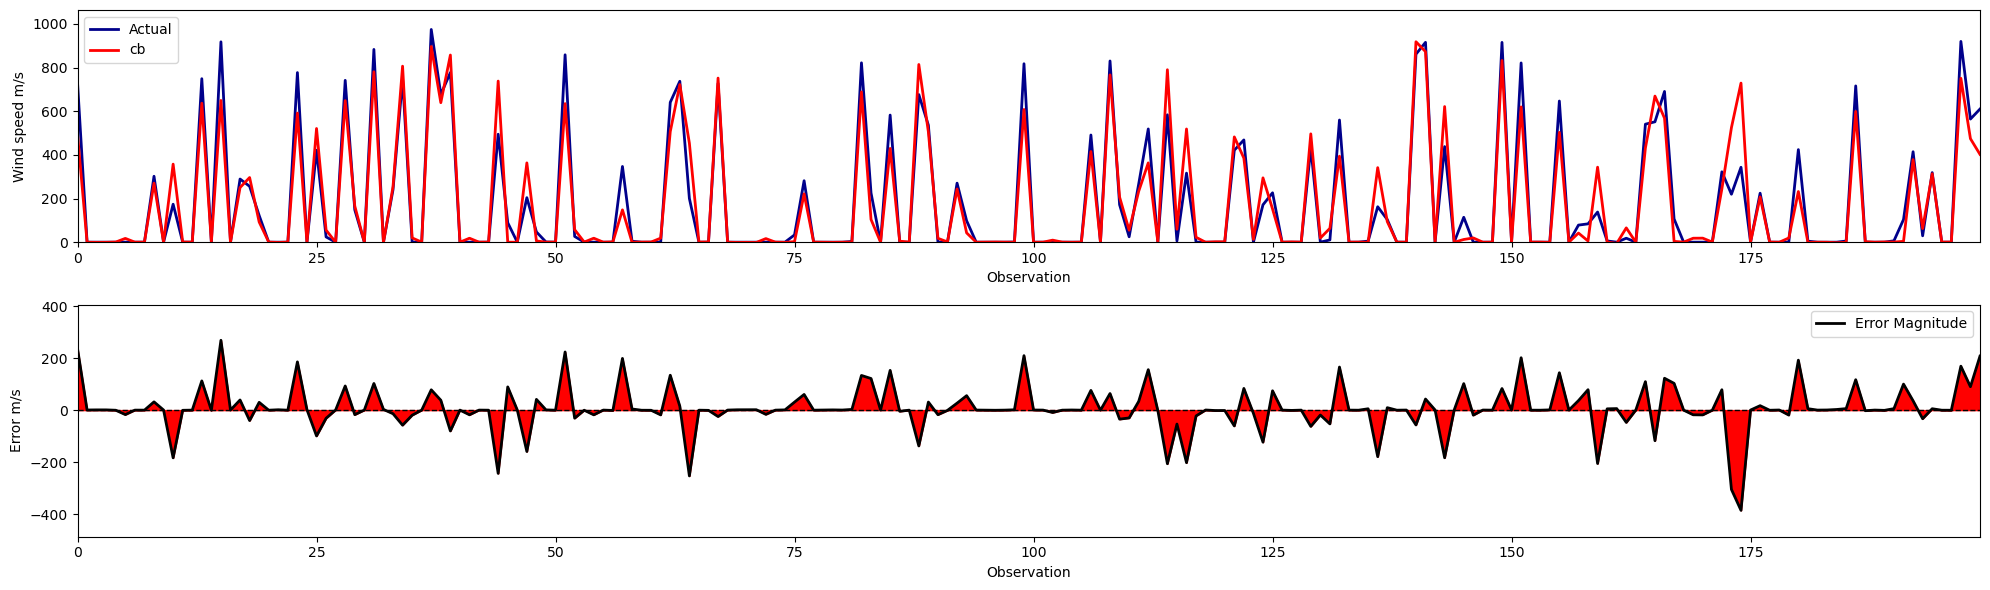

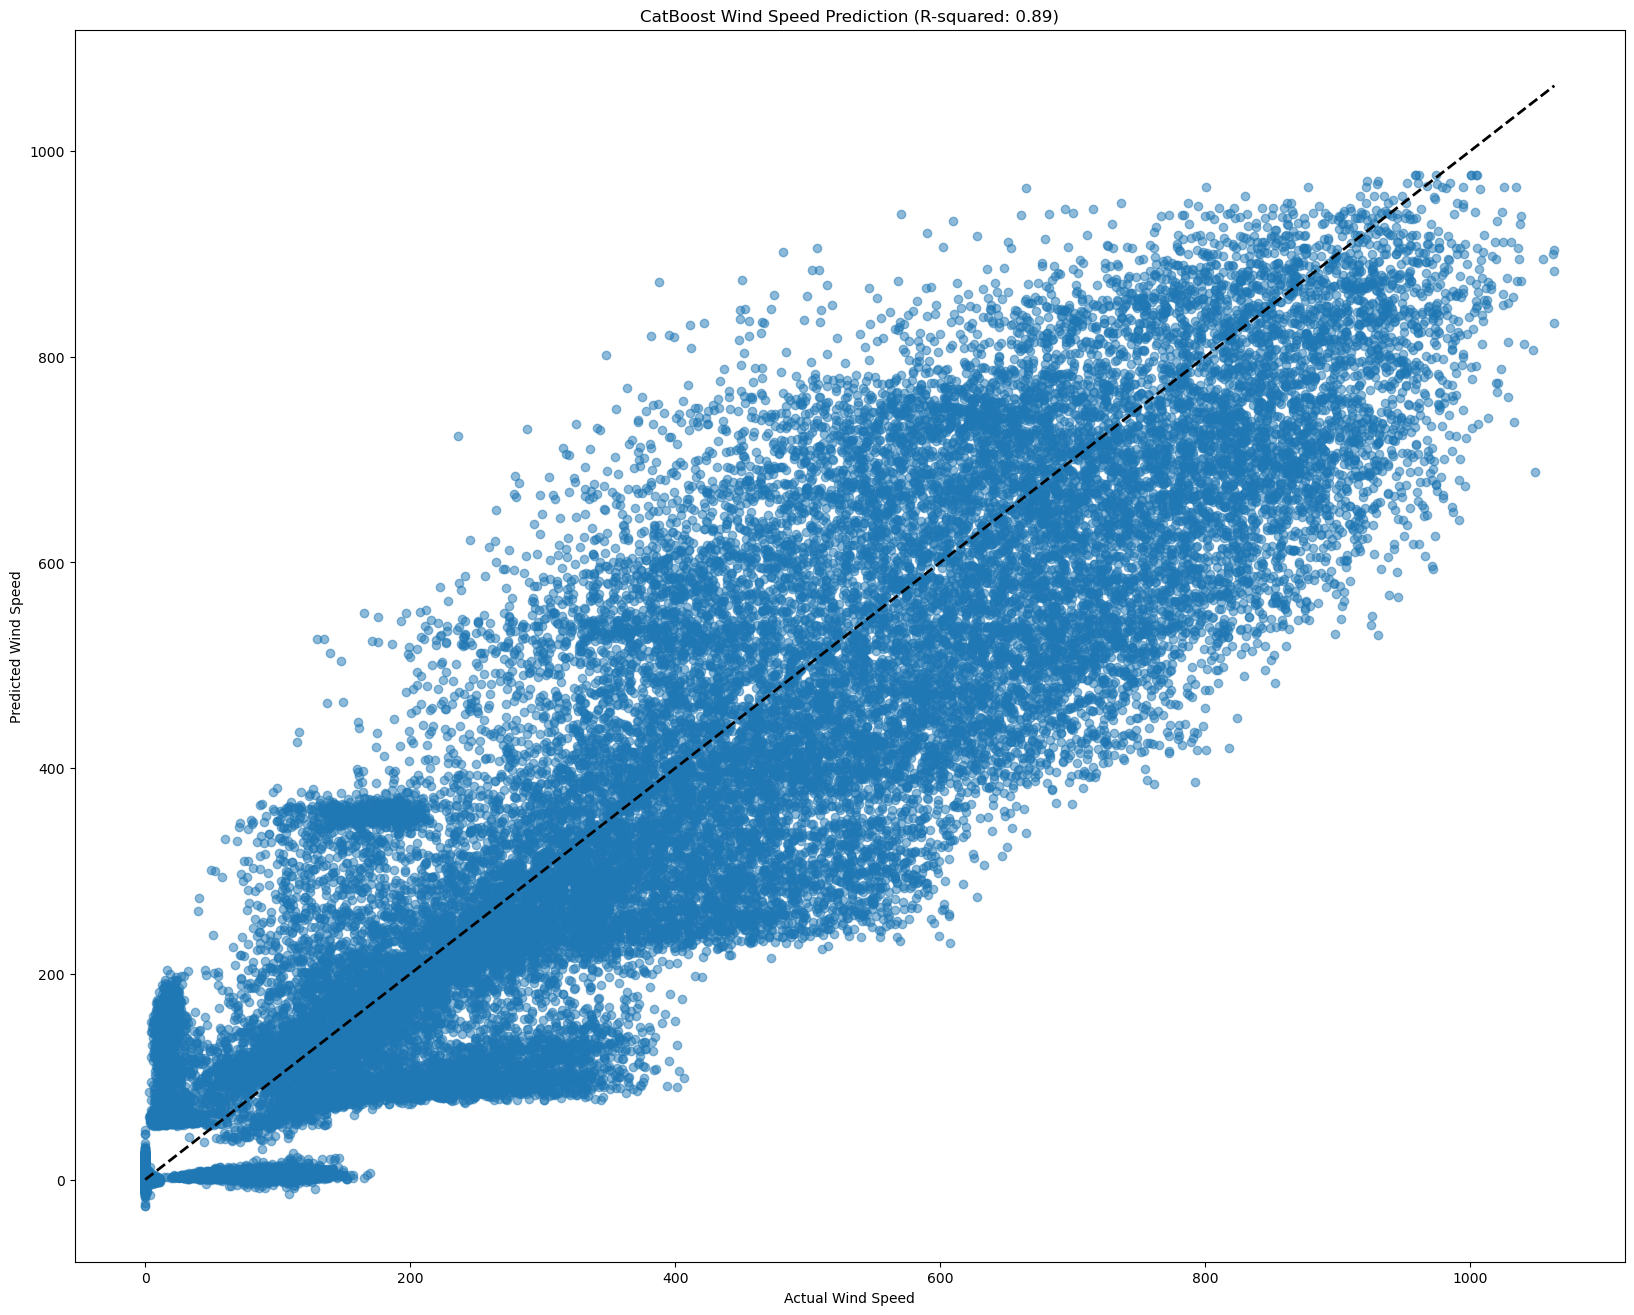

In [39]:
plot_actual_vs_predicted(test_y, predictions_catboost, label='cb')

# Create the scatter plot
plt.figure(figsize=(20, 16))
plt.scatter(test_y, predictions_catboost, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title(f'CatBoost Wind Speed Prediction (R-squared: {r2:.2f})')
plt.show()

In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# Initialize the XGBoost regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, verbose=False)

# Fit the model to the training data
xgb_model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_xgb = xgb_model.predict(test_X_scaled)

# Evaluate the model's performance
r2 = r2_score(test_y, predictions_xgb)
print(f"R-squared: {r2:.2f}")

evaluate_model(predictions_xgb, test_y, "west Metrics Evaluation for xgb Model")


C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [15:26:49] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


R-squared: 0.89
west Metrics Evaluation for xgb Model
  Metric         Value
0     R²      0.892481
1   RMSE     89.552760
2  rRMSE      0.455003
3    MBE    -12.870593
4   MABE     52.061201
5    MAE     52.061201
6    MSE   8026.783611
7    AIC 646286.908961


Metric         Value
0     R²      0.892481
1   RMSE     89.552760
2  rRMSE      0.455003
3    MBE    -12.870593
4   MABE     52.061201
5    MAE     52.061201
6    MSE   8026.783611
7    AIC 646286.908961

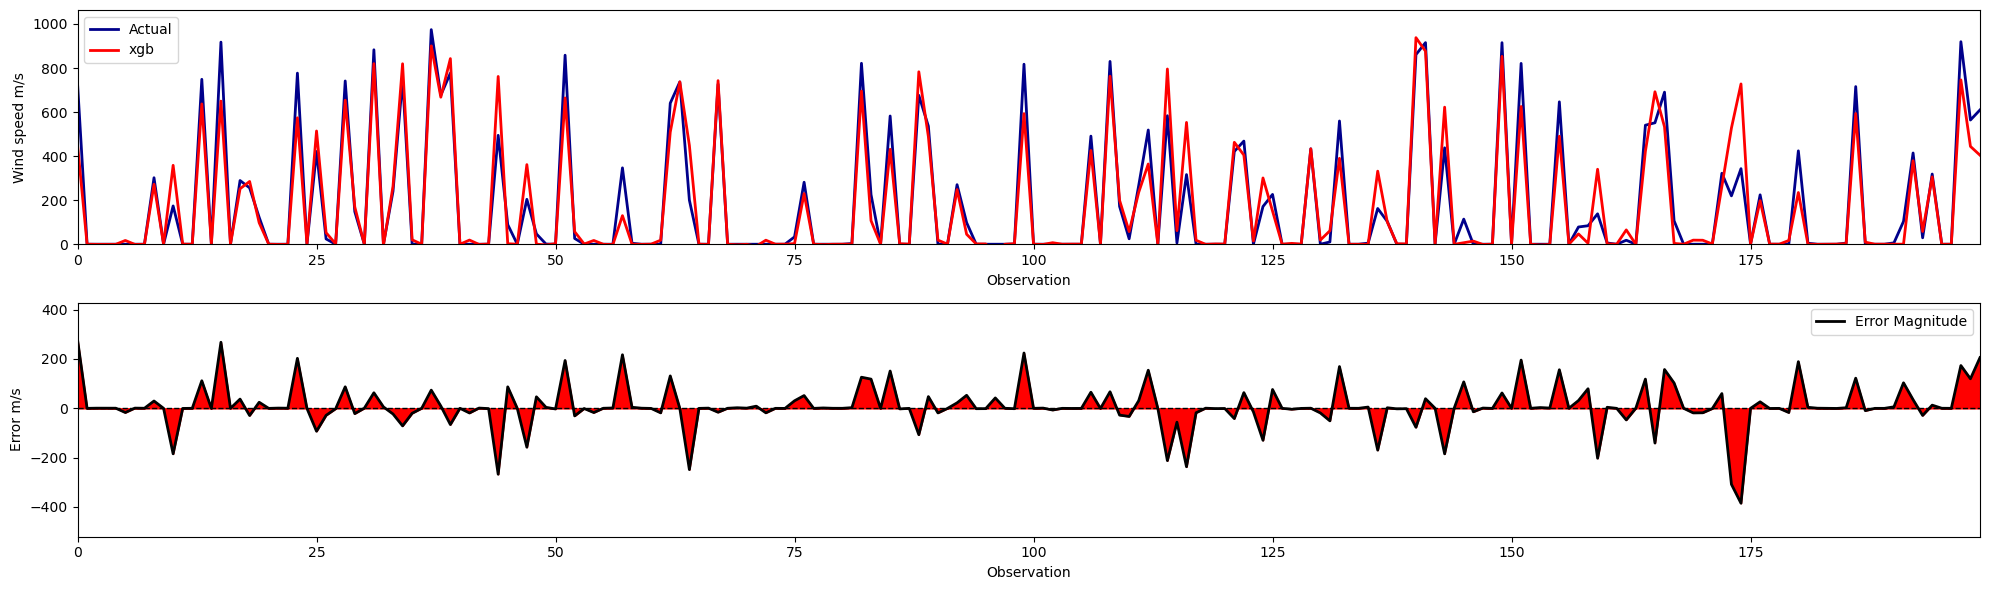

In [41]:
plot_actual_vs_predicted(test_y, predictions_xgb, label='xgb')

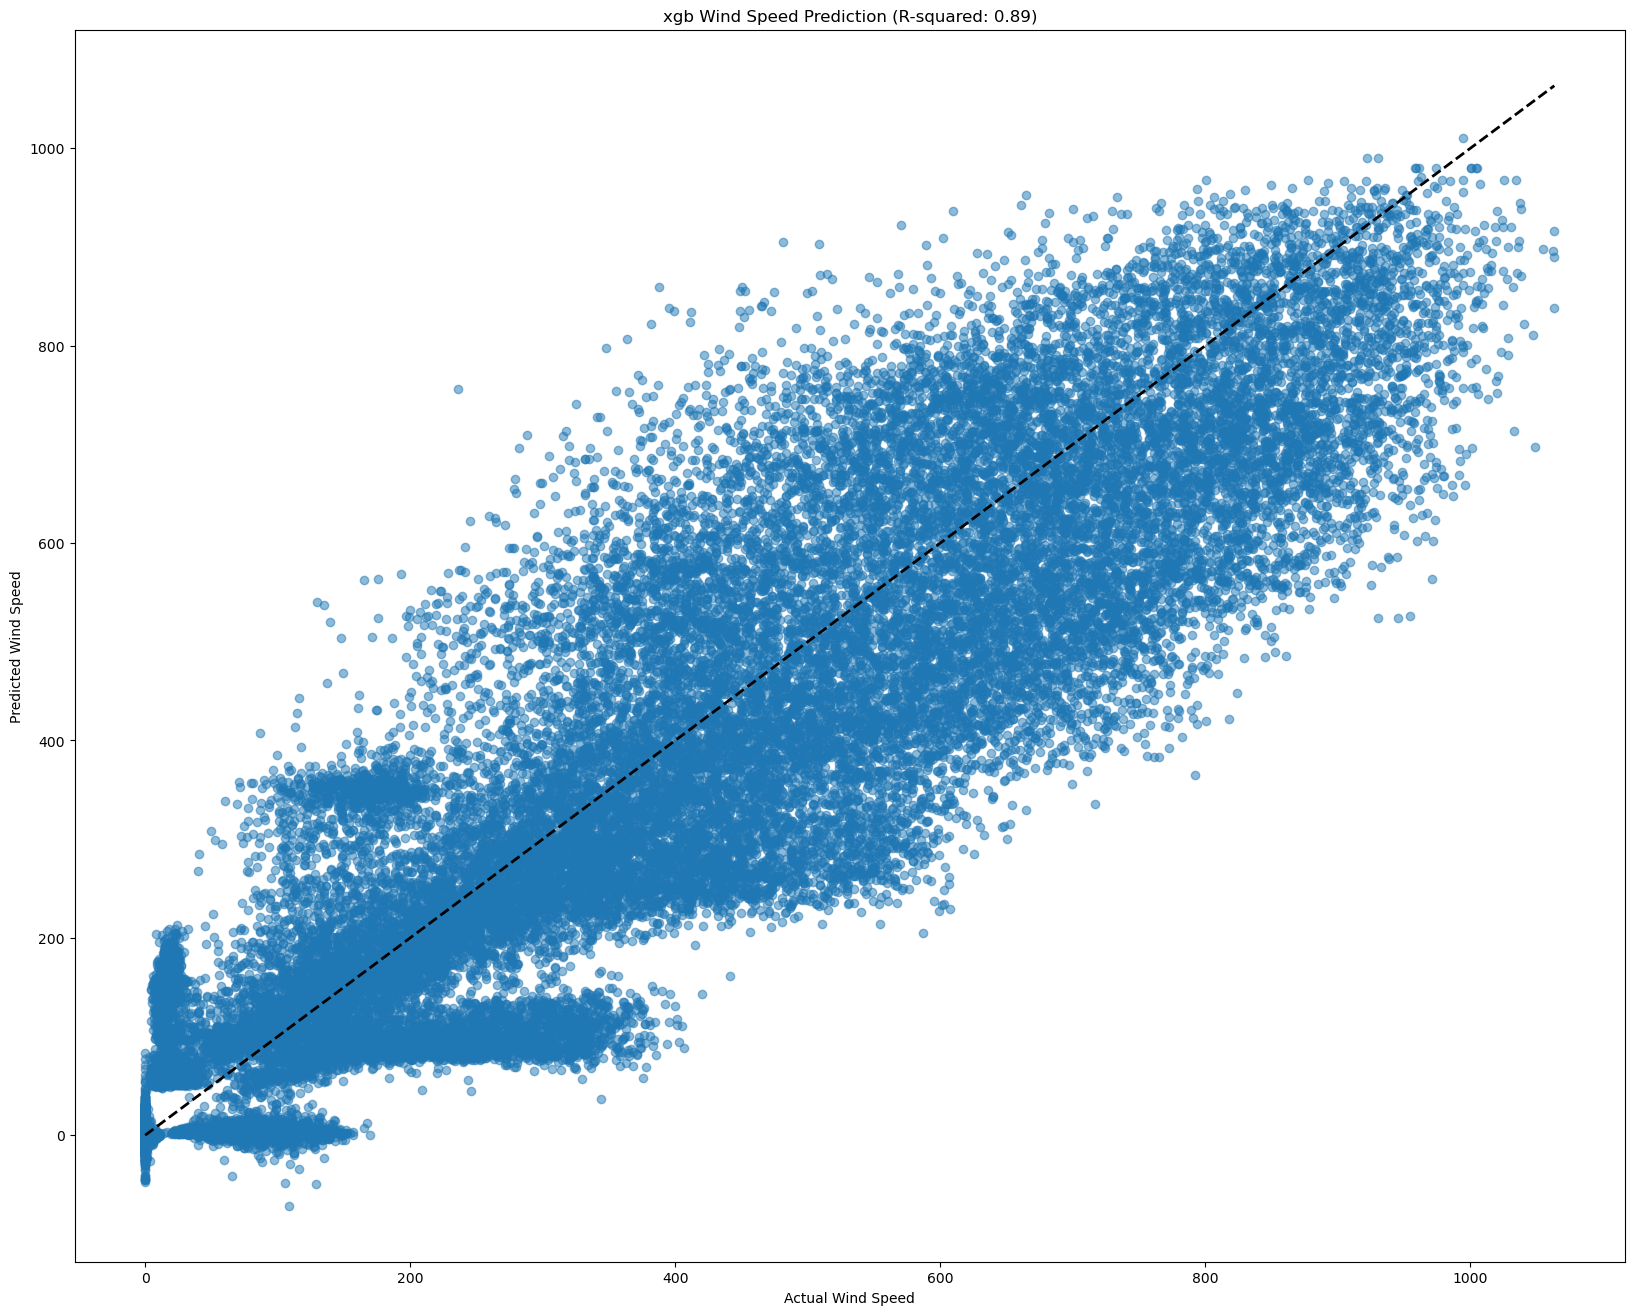

In [42]:
# Create the scatter plot
plt.figure(figsize=(20, 16))
plt.scatter(test_y, predictions_xgb, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title(f'xgb Wind Speed Prediction (R-squared: {r2:.2f})')
plt.show()

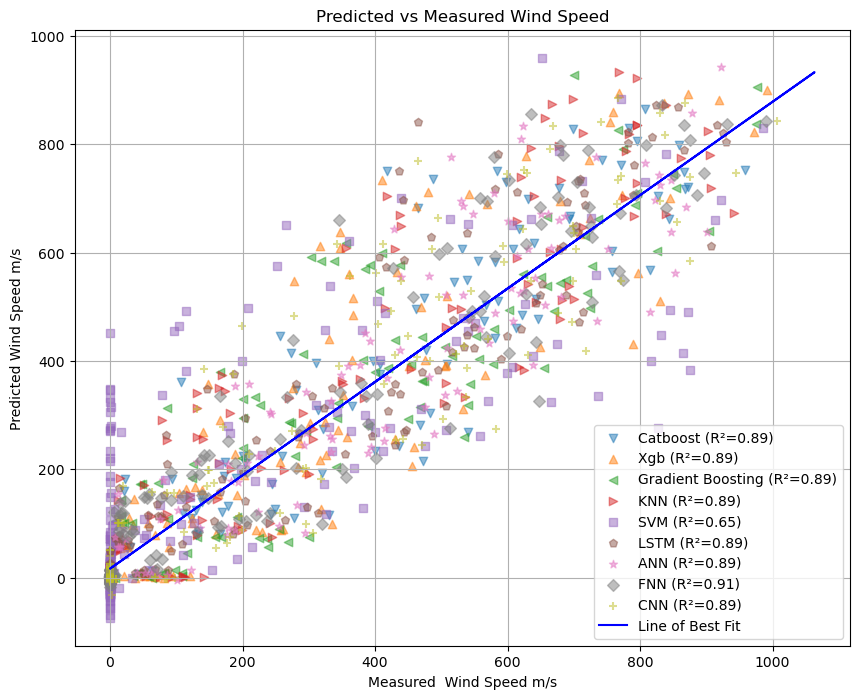

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to plot scatter plot for each model with different markers
def plot_predictions(test_y, predictions, model_name, marker, sample_size=200):
    # Randomly sample 200 points for plotting
    sample_indices = np.random.choice(len(test_y), size=sample_size, replace=False)
    test_y_sample = test_y[sample_indices].flatten()
    predictions_sample = predictions[sample_indices].flatten()

    # Calculate R^2 score
    r2 = r2_score(test_y, predictions)

    # Plot scatter plot with specific marker
    plt.scatter(test_y_sample, predictions_sample, label=f"{model_name} (R²={r2:.2f})", alpha=0.5, marker=marker)

# Define marker styles for different models
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'D', 'X', '+']

# Combine all predictions for a single line of best fit
all_predictions = np.concatenate([
    predictions_catboost.flatten(),
    predictions_xgb.flatten(),
    predictions_gbm.flatten(),
    predictions_svm.flatten(),
    predictions_knn.flatten(),
    predictions_lstm.flatten(),
    predictions_ann.flatten(),
    predictions_dl.flatten(),
    predictions_cnn.flatten(),
])

# Flatten test_y to match the shape of all_predictions
test_y_flat = np.tile(test_y.flatten(), len(all_predictions) // len(test_y.flatten()))

# Calculate the line of best fit for all predictions
z = np.polyfit(test_y_flat, all_predictions, 1)
p = np.poly1d(z)

# Plot settings
plt.figure(figsize=(10, 8))

# Plot scatter plot for each model with different markers
plot_predictions(test_y, predictions_catboost, 'Catboost', markers[1])
plot_predictions(test_y, predictions_xgb, 'Xgb', markers[2])
plot_predictions(test_y, predictions_gbm, 'Gradient Boosting', markers[3])
plot_predictions(test_y, predictions_knn, 'KNN', markers[4])
plot_predictions(test_y, predictions_svm, 'SVM', markers[5])
plot_predictions(test_y, predictions_lstm, 'LSTM', markers[6])
plot_predictions(test_y, predictions_ann, 'ANN', markers[7])
plot_predictions(test_y, predictions_dl, 'FNN', markers[8])
plot_predictions(test_y, predictions_cnn, 'CNN', markers[10])

# Plot line of best fit for all predictions in blue
plt.plot(test_y, p(test_y.flatten()), color='blue', label='Line of Best Fit')

# Plot settings
plt.xlabel('Measured  Wind Speed m/s')
plt.ylabel('Predicted Wind Speed m/s')
plt.title('Predicted vs Measured Wind Speed')
plt.legend()
plt.grid(True)
plt.show()